# First code 

In [9]:
%load_ext autoreload
%autoreload 2

https://ipython-books.github.io/101-analyzing-the-frequency-components-of-a-signal-with-a-fast-fourier-transform/

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## Question : 
- nb mesure par secondes

In [19]:
time = 1 # in seconds
unit_time = 's'

In [20]:
df = pd.read_csv('../data/EEGArchi13mPFC.txt')
df['time'] = df.index * time
df.rename(columns={'0': 'V'}, inplace=True)

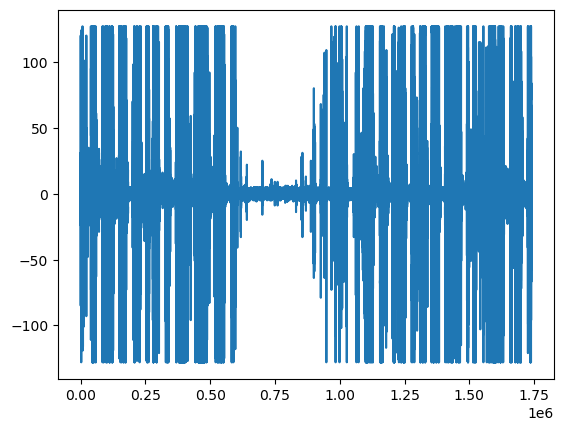

In [22]:
plt.plot(df['time'], df['V'])

## Fourier transform

Text(0.5, 1.0, 'Fourier transform of the EEG signal')

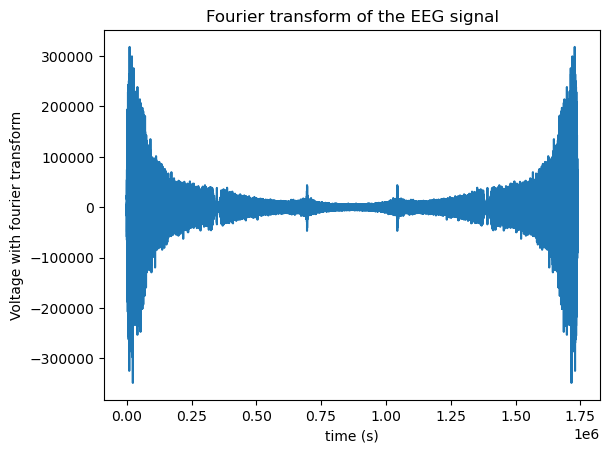

In [14]:
import scipy as sp 
import scipy.fftpack
df_f = df.copy()
df_f['V'] = sp.fftpack.fft(df_f['V'])
plt.plot(df_f['time'], df_f['V'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('Voltage with fourier transform')
plt.title('Fourier transform of the EEG signal')

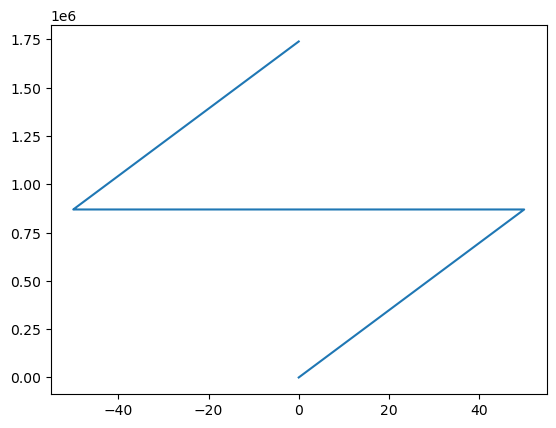

In [27]:
fs = 100 # sampling frequency = nb measurements per second
df_f['freq'] = sp.fftpack.fftfreq(df_f.shape[0]) * fs 
plt.plot(df_f['freq'], df_f['time'])

### power spectral density (PSD)

The power spectral density (PSD) of the signal describes the power present in the signal as a function of frequency, per unit frequency. Power spectral density is commonly expressed in watts per hertz (W/Hz). https://en.wikipedia.org/wiki/Spectral_density#:~:text=The%20power%20spectral%20density%20(PSD)%20of%20the%20signal%20describes%20the,hertz%20(W%2FHz).

Text(0.5, 1.0, 'Power spectral density of the EEG signal')

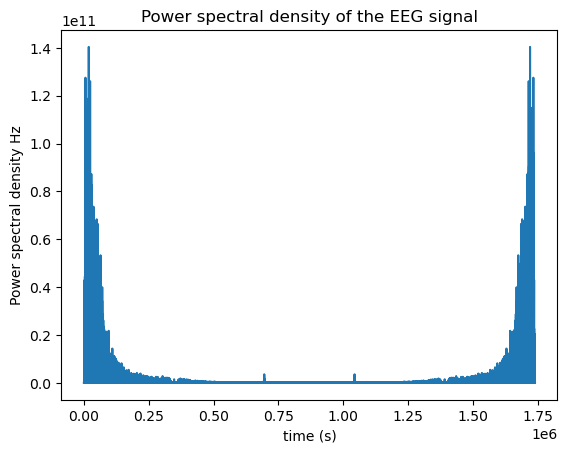

In [15]:
import numpy as np 
df_f["psd"] = np.abs(df_f["V"]) ** 2
plt.plot(df_f['time'], df_f['psd'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('Power spectral density Hz')
plt.title('Power spectral density of the EEG signal')

Heatmap 

En Hz 

Puis distinguer en fct des ondes

array([[<AxesSubplot:title={'center':'psd'}>]], dtype=object)

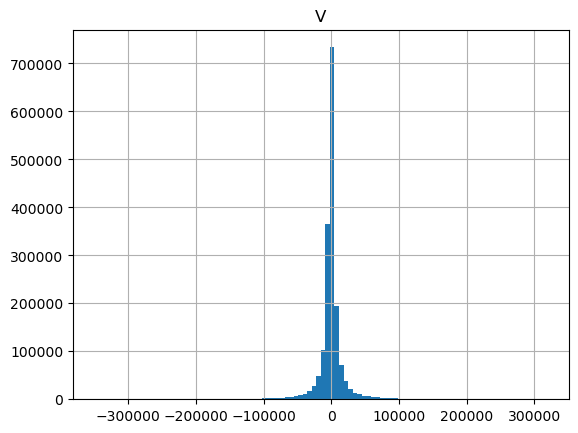

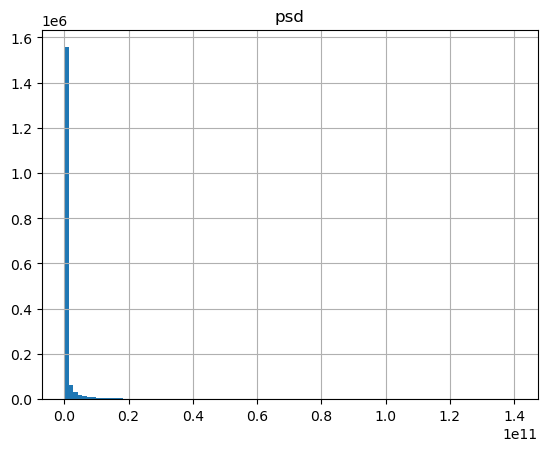

In [8]:
df_f.hist(column='V', bins=100)
df_f.hist(column='psd', bins=100)

Text(0.5, 1.0, 'Frequency domain with fourier transform')

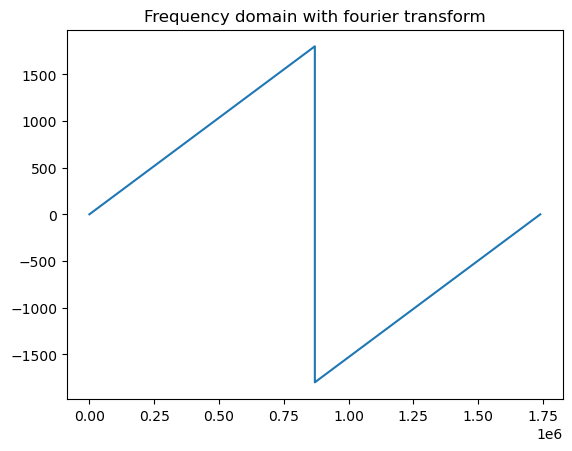

In [9]:
df_f["fftfreq"] = sp.fftpack.fftfreq(df_f.shape[0], 1. / (60*60))
plt.plot(df_f['time'], df_f['fftfreq'])
plt.title('Frequency domain with fourier transform')